In [298]:
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
toml_perf = pd.read_csv('~/results/toml_methods.csv')
toml_perf

,Method,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,...,T_491,T_492,T_493,T_494,T_495,T_496,T_497,T_498,T_499,Mean
0,add_route,4156754609,13784728,2383138673,1682383072,3740239165,506803789,3528031836,311246627,6002567172,...,2360426606,1980976299,1777460367,2160780436,2108838505,2380434980,2662326428,2077999643,474866794,2.106514e+09
1,delete_route,31215450,36098894,38771774,37114802,37667813,36604652,35297805,41721109,58535881,...,1327753,816597,725198,673927,733915,724938,1368282,543080,1174387,2.277618e+07
2,get_all_routes,61130344,57176536,61014690,58200009,57219935,57439808,57556968,57482543,57744970,...,57754095,57621801,57513195,59784176,57492847,58112126,57685638,57513266,57820296,5.795839e+07


The time taken in nanoseconds to *add/delete/get_all* 1, 2, ..., 500 routes to/from the routing table of **TraefikTomlProxy**.

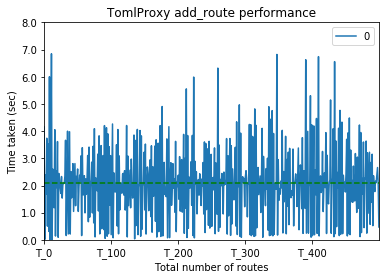

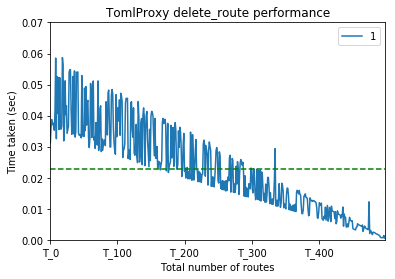

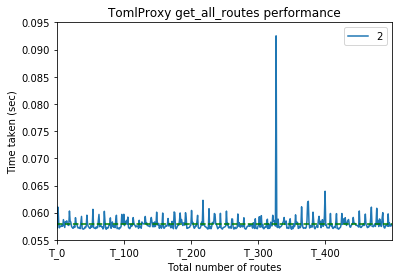

In [300]:
def plot_method_perf(df, method, col_idx, precision, bottom=False):
    df.loc[[col_idx]].T[1:-1].plot()
    locs,labels = plt.yticks()
    yticks(locs, map(lambda x: f"%0.{precision}f" % x, locs/1e9))
    if bottom:
        axes = plt.gca()
        axes.set_ylim(bottom=0)
    plt.xlabel("Total number of routes")
    plt.ylabel("Time taken (sec)")
    plt.title(f"TomlProxy {method} performance")
    mean = float(df.loc[[col_idx]]["Mean"])
    plt.axhline(y=mean, color='g', linestyle="--")
    
plot_method_perf(toml_perf, "add_route", 0, 1, True)
plot_method_perf(toml_perf, "delete_route", 1, 2, True)
plot_method_perf(toml_perf, "get_all_routes", 2, 3)

In [301]:
etcd_perf = pd.read_csv('~/results/etcd_methods.csv')
etcd_perf

,Method,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,...,T_491,T_492,T_493,T_494,T_495,T_496,T_497,T_498,T_499,Mean
0,add_route,2077569116,2634678702,1267597746,2136080898,1985416597,2209565513,2209349798,1885309564,4641407881,...,10553080714,11924858179,9863834803,8568561309,13251372353,9622048053,13130082400,8581109275,12043023142,6.228054e+09
1,delete_route,5827463,21870502,9489432,11265284,12014873,9992438,72686050,17051358,9582343,...,57563151,17722087,9156835,10788218,35993770,19237254,11610208,10299258,10794244,2.252190e+07
2,get_all_routes,735025645,623530682,733698688,709323135,713503436,645126293,715338746,614298938,609960737,...,722313921,685894241,686478707,703924699,716692029,708918814,743631287,713847956,702647384,6.810141e+08


The time taken in nanoseconds to *add/delete/get_all* 1, 2, ..., 500 routes to/from the routing table of **TraefikEtcdProxy**.

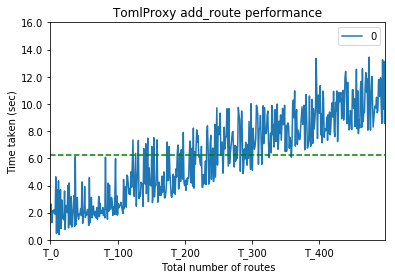

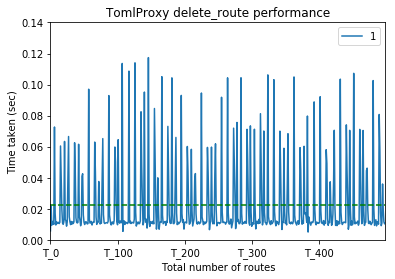

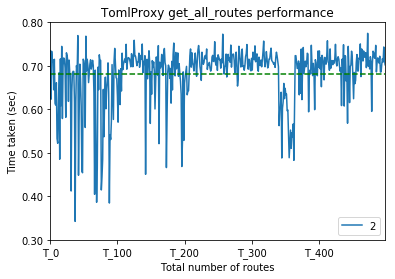

In [302]:
plot_method_perf(etcd_perf, "add_route", 0, 1, True)
plot_method_perf(etcd_perf, "delete_route", 1, 2, True)
plot_method_perf(etcd_perf, "get_all_routes", 2, 2)

In [303]:
chp_perf = pd.read_csv('~/results/chp_methods.csv')
chp_perf

,Method,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,...,T_491,T_492,T_493,T_494,T_495,T_496,T_497,T_498,T_499,Mean
0,add_route,18990451,4089674,3511817,4744879,3692856,2642477,2457251,2449223,4618674,...,2100452,2037090,1863866,1986896,1983282,2000101,1949327,1936776,2296481,2651554.832
1,delete_route,3414412,2537855,2222262,2092671,2136492,2149245,3431026,2723990,4556298,...,1943147,1817877,1831186,2022724,2717618,3633885,3508852,2179302,2073003,2261706.490
2,get_all_routes,56212296,7452928,7857937,10140357,6936800,6659505,6691829,10086009,6936469,...,8207064,8406340,9472498,10215749,7185801,6910187,6835800,8781932,7906994,8546720.918


The time taken in nanoseconds to *add/delete/get_all* 1, 2, ..., 500 routes to/from the routing table of **CHP**.

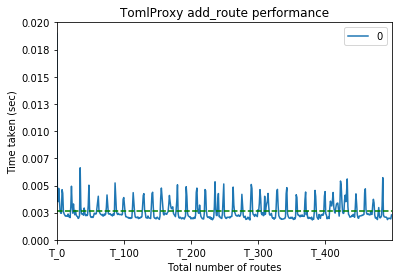

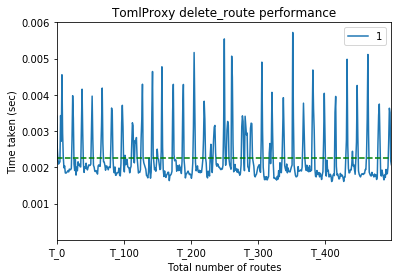

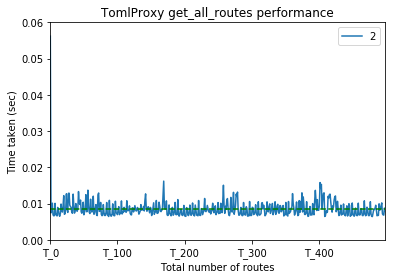

In [304]:
plot_method_perf(chp_perf, "add_route", 0, 3, True)
plot_method_perf(chp_perf, "delete_route", 1, 3, True)
plot_method_perf(chp_perf, "get_all_routes", 2, 2)

1000 *small/large (1MB/10MB) http/ws* requests are sent to the proxy:
        - sequentially
        - max 2 concurrent
        - max 3 concurrent
        ...
        - max 9 concurrent
    The time taken to make these requests is measured and
    the throughput is computed as the number of requests that can be served in a millisecond.

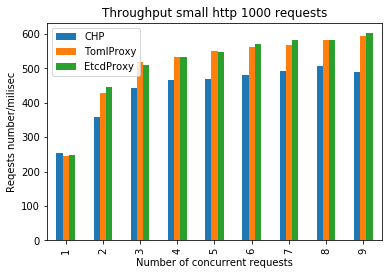

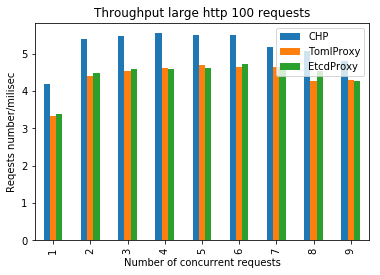

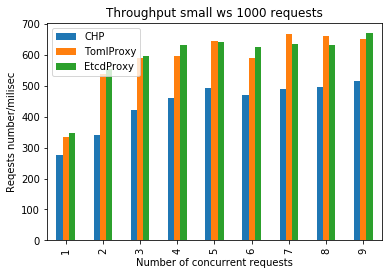

In [305]:
http_throughput_small = pd.read_csv('~/results/http_throughput_small.csv')
http_throughput_large = pd.read_csv('~/results/http_throughput_large.csv')
ws_throughput = pd.read_csv('~/results/ws_throughput.csv')
def plot_throughput(df, proto, size, req_number, bar_plot):
    df2 = df.T[1:]
    df2.columns=["CHP", "TomlProxy", "EtcdProxy"]
    if bar_plot:
        df2.plot(kind="bar")
    else:
        df2.plot()
    plt.ylabel("Reqests number/milisec")
    plt.xlabel("Number of concurrent requests")
    plt.title(f"Throughput {size} {proto} {req_number} requests")

plot_throughput(http_throughput_small, "http", "small", 1000, True)
plot_throughput(http_throughput_large, "http", "large", 100, True)
plot_throughput(ws_throughput, "ws", "small", 1000, True)

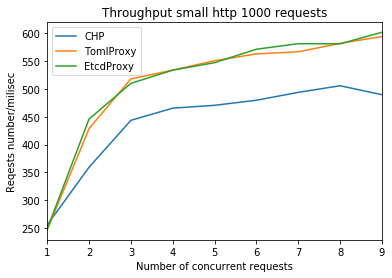

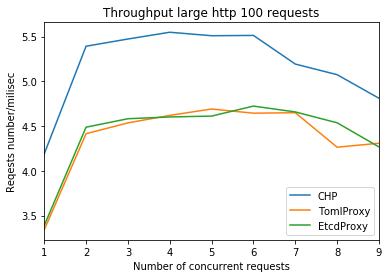

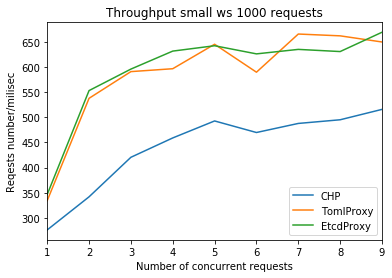

In [306]:
plot_throughput(http_throughput_small, "http", "small", 1000, False)
plot_throughput(http_throughput_large, "http", "large", 100, False)
plot_throughput(ws_throughput, "ws", "small", 1000, False)